# 𝐴𝑡𝑖𝑣𝑖𝑑𝑎𝑑𝑒(3.0): Treinar e Avaliar a arquitetura adaptada para o conjunto de imagens de animais (gato, cachorro e panda)

1. Modifiquem os hiperparâmetros: epochs, batch_size e optimizer a fim de melhorar a acurácia de validação. Quando alcançar um conjunto, avaliar o desempenho de classificação do melhor modelo com os dados de teste;
2. Modificar a arquitetura: inserir e remover camadas, alterar profundidade das camadas e comparar os resultados de classificação no conjunto de teste com aquele alcançado no item 1.

# 1. Importando as bibliotecas

In [1]:
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Convolution2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers import Dropout
from tensorflow.keras import utils
import numpy as np
from sklearn.model_selection import train_test_split

from tensorflow.keras.utils import load_img
import matplotlib.pyplot as plt
import os

# 2. Carregando dados

In [2]:
DATASET_PATH = os.path.join(os.getcwd(), 'datasets')
DATASET_PATH = os.path.join(DATASET_PATH, 'animals')

categories = ['dogs', 'panda', 'cats']

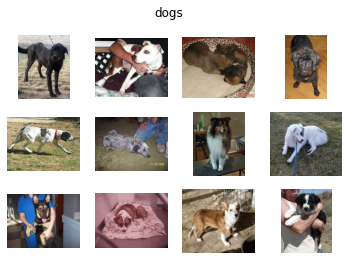

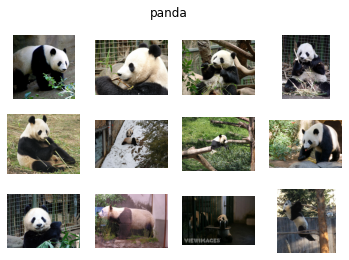

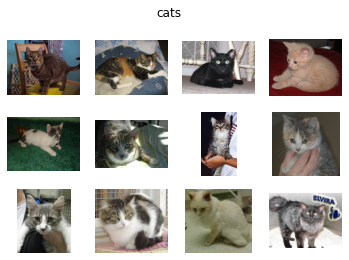

In [3]:
for category in categories:
    fig, _ = plt.subplots(3,4)
    fig.suptitle(category)
    fig.patch.set_facecolor('xkcd:white')
    path_category = os.path.join(DATASET_PATH, category)
    for k, v in enumerate(os.listdir(path_category)[:12]):
        img = plt.imread(os.path.join(path_category, v))
        plt.subplot(3, 4, k+1)
        plt.axis('off')
        plt.imshow(img)
    plt.show()

# 3. Pré-processamento

In [4]:
imagePaths = []
labels = []

for k, category in enumerate(categories):
    path_category = os.path.join(DATASET_PATH, category)
    for f in os.listdir(path_category):
        imagePaths.append([os.path.join(path_category, f), k]) # k=0 : 'dog', k=1 : 'panda', k=2 : 'cat'
        labels.append(k)

In [5]:
# Dividindo os dados em treinamento, validação e teste
X_train_val, X_test, y_train_val, y_test = train_test_split(imagePaths, labels, test_size=0.1, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.1, random_state=42)

In [6]:
# Carregando as imagens
X_train = np.array([np.array(load_img(imagePath[0], target_size=(64, 64))) for imagePath in X_train])
X_val = np.array([np.array(load_img(imagePath[0], target_size=(64, 64))) for imagePath in X_val])
X_test = np.array([np.array(load_img(imagePath[0], target_size=(64, 64))) for imagePath in X_test])

In [7]:
# Normalizando os valores dos pixels
X_train = X_train.astype('float32') / 255.0
X_val = X_val.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

In [8]:
# Convertendo os rótulos para one-hot encoding
y_train = utils.to_categorical(y_train)
y_val = utils.to_categorical(y_val)
y_test = utils.to_categorical(y_test)

In [14]:
len(labels)

3000

In [20]:
y_train.shape, X_train.shape, 

((2430, 3), (2430, 64, 64, 3))

In [21]:
y_val.shape, X_val.shape

((270, 3), (270, 64, 64, 3))

In [22]:
y_test.shape, X_test.shape

((300, 3), (300, 64, 64, 3))

# 7. Modificando arquitetura

In [9]:
# Inicializando a CNN
classifier = Sequential()

# Camada de convolução 1
classifier.add(Convolution2D(32, kernel_size=(3,3), input_shape=(64, 64, 3), activation='relu', padding='same', name='conv_1'))
classifier.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2), padding='same', name='pool_1'))

# Camada de convolução 2
classifier.add(Convolution2D(64, kernel_size=(3,3), activation='relu', padding='same', name='conv_2'))
classifier.add(Convolution2D(64, kernel_size=(3,3), activation='relu', padding='same', name='conv_3'))
classifier.add(Dropout(0.25))
classifier.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2), padding='same', name='pool_2'))

# Camada de convolução 3
classifier.add(Convolution2D(128, kernel_size=(3,3), activation='relu', padding='same', name='conv_4'))
classifier.add(Convolution2D(128, kernel_size=(3,3), activation='relu', padding='same', name='conv_5'))
classifier.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2), padding='same', name='pool_3'))

# Flattening Vetorizando os mapas de características do último pooling (camada de entrada)
classifier.add(Flatten())

# Dropout
classifier.add(Dropout(0.5))

# Camada totalmente conectada 1
classifier.add(Dense(units=512, activation='relu', name='dense_1'))

# Camada totalmente conectada 2
classifier.add(Dense(units=256, activation='relu', name='dense_2'))

# Camada de saída
classifier.add(Dense(units=3, activation='softmax', name='classification'))

In [10]:
classifier.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv_1 (Conv2D)             (None, 64, 64, 32)        896       
                                                                 
 pool_1 (MaxPooling2D)       (None, 32, 32, 32)        0         
                                                                 
 conv_2 (Conv2D)             (None, 32, 32, 64)        18496     
                                                                 
 conv_3 (Conv2D)             (None, 32, 32, 64)        36928     
                                                                 
 dropout (Dropout)           (None, 32, 32, 64)        0         
                                                                 
 pool_2 (MaxPooling2D)       (None, 16, 16, 64)        0         
                                                                 
 conv_4 (Conv2D)             (None, 16, 16, 128)       7

# 8. Teste Nova arquitetura

In [11]:
from tensorflow.keras.optimizers import Adam

optimizer = Adam(learning_rate=0.001)

epochs = 60
batch_size = 40

classifier.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

checkpoint = keras.callbacks.ModelCheckpoint('best_model2.h5', monitor='val_loss', verbose=1, save_best_only=True, mode='auto', save_freq='epoch') 
earlystop = keras.callbacks.EarlyStopping(patience=15)

history = classifier.fit(X_train, y_train, validation_data=(X_val, y_val), batch_size=batch_size, epochs=epochs, callbacks=[checkpoint, earlystop], verbose=1)

Epoch 1/60
61/61 [==============================] - ETA: 0s - loss: 0.9668 - accuracy: 0.4638
Epoch 1: val_loss improved from inf to 0.83334, saving model to best_model2.h5
61/61 [==============================] - 12s 181ms/step - loss: 0.9668 - accuracy: 0.4638 - val_loss: 0.8333 - val_accuracy: 0.5296
Epoch 2/60
61/61 [==============================] - ETA: 0s - loss: 0.7645 - accuracy: 0.6016
Epoch 2: val_loss improved from 0.83334 to 0.73514, saving model to best_model2.h5
61/61 [==============================] - 11s 177ms/step - loss: 0.7645 - accuracy: 0.6016 - val_loss: 0.7351 - val_accuracy: 0.5963
Epoch 3/60
61/61 [==============================] - ETA: 0s - loss: 0.7042 - accuracy: 0.6292
Epoch 3: val_loss did not improve from 0.73514
61/61 [==============================] - 11s 178ms/step - loss: 0.7042 - accuracy: 0.6292 - val_loss: 0.7512 - val_accuracy: 0.6630
Epoch 4/60
61/61 [==============================] - ETA: 0s - loss: 0.6658 - accuracy: 0.6556
Epoch 4: val_loss i

61/61 [==============================] - ETA: 0s - loss: 0.0978 - accuracy: 0.9663
Epoch 30: val_loss did not improve from 0.56571
61/61 [==============================] - 11s 188ms/step - loss: 0.0978 - accuracy: 0.9663 - val_loss: 0.9789 - val_accuracy: 0.7407
Epoch 31/60
61/61 [==============================] - ETA: 0s - loss: 0.0596 - accuracy: 0.9790
Epoch 31: val_loss did not improve from 0.56571
61/61 [==============================] - 11s 183ms/step - loss: 0.0596 - accuracy: 0.9790 - val_loss: 1.1192 - val_accuracy: 0.7481
Epoch 32/60
61/61 [==============================] - ETA: 0s - loss: 0.0555 - accuracy: 0.9848
Epoch 32: val_loss did not improve from 0.56571
61/61 [==============================] - 11s 181ms/step - loss: 0.0555 - accuracy: 0.9848 - val_loss: 1.0626 - val_accuracy: 0.7704


# 9. Avaliando Nova arquitetura

In [12]:
best_model = keras.models.load_model("best_model2.h5")

In [13]:
score = best_model.evaluate(X_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 0.6248871088027954
Test accuracy: 0.7166666388511658
